# Demo Pos Hujan 

_Notebook_ ini akan mendemonstrasikan penggunaan module `hidrokit.prepkit` yang telah saya buat dan menunjukkan penggunaan _python_ saat melakukan analisis hidrologi (atau data analisis). Saat ini hanya pengenalan awal saja, belum dilakukan secara sepenuhnya analisis. Hanya memberi bayangan apa yang bisa dilakukan oleh _python_ dan _jupyter notebook_. 

## Tentang `Hidrokit.prepkit`

`.prepkit` merupakan module bagian dari hidrokit yang berisikan fungsi pengolahaan data mentah menjadi data yang siap di analisis (_data munging_). Saat ini `prepkit` dibuat dengan dasar berpikir mengolah data hidrologi berupa curah hujan, debit (AWLR), dll. Sehingga, penggunaan `prepkit` sekarang hanya dibatasi dengan tujuan penggunaan pengolahan data hidrologi. Akan tetapi, Anda bisa mengembangkan `prepkit` lebih lanjut untuk menyesuaikan kebutuhan Anda.


## Syarat Penggunaan

Saat ini penggunaan _script_ ini __tidak langsung pakai__, setidaknya pengguna __harus__ terbiasa dengan penggunaan python (OOP), serta memahami penggunaan `Pandas` dan sifat `dataframe`. Berbeda dengan _software_ yang biasa digunakan, setidaknya anda harus memahami bahasa pemrograman, dan dengan dokumentasi terbatas Anda diharapkan mampu mengevaluasi _script/program_ yang telah saya buat. Akan tetapi, saya akan membuat penggunaan kedepannya lebih mudah dan praktis digunakan. Dan mengingat ini merupakan project sampingan, perkembangannya lambat dan bisa terhenti tiba-tiba.

----

__Catatan__: data `../testdata/` tidak tersedia dalam github terkait saya tidak tahu protokol terkait penyebaran informasi ini.

# Aksi `.prepkit`

----

- Contoh dalam _notebook_ ini hanya untuk file excel, dengan _single sheet_, dan nama file menunjukkan tahun dan nama stasiun. (Penggunaan untuk _multi sheet_, _multi file_ akan dibahas di _notebook_ berikutnya).

## Import Library

Melakukan import library yang akan digunakan:
- `numpy` : library utama dalam penggunaan pandas
- `pandas` : library untuk pengelolaan data
- `matplotlib.pyplot` : library utama dalam penggunaan plot
- `pathlib` : built-in library untuk navigasi sistem
- `prepkit` : module `hidrokit` untuk persiapan pengelolaan data
- `viewkit` : module `hidrokit` untuk penampilan data

In [1]:
# INITIALIZATION, importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from hidrokit import prepkit, viewkit
import seaborn as sns
%matplotlib inline

In [2]:
## TEST MODE (autoreload module)
%load_ext autoreload
%autoreload 2
%aimport hidrokit

In [3]:
## Temporary View Functions
def viewp(df, fmt='en'):
    return viewkit.in_pivot(df, col=df.columns[0], month_fmt=fmt)

## Menentukan dokumen

Dokumen contoh berupa _single file_ __dan__ _single sheet_. Berikut gambar isi excelnya:

![_Screenshot_ Excel](./contohxls01.png)

Nama format dokumen ini saya sebut `phderi` singkatan `poshujan-deri` (Karena data excelnya saya dapat dari deri). Saat ini, format tersebut merupakan format `default`.

Kode dibawah ini mendemokan bagaimana memperoleh tabel hujan dalam excel tanpa perlu membuka file tersebut (karena membuka excel hanya untuk memperoleh data hujan itu cukup merepotkan).

`prepkit.get_rawdf(dokumen)`, fungsi melakukan pengambilan data mentah (raw) dalam bentuk dataframe (df) pandas.

In [4]:
dokumen = '../testdata/xls/fmderi/PHTANJUNGBARU/2016 HUJAN TANJUNG BARU.xls'
rawph = prepkit.get_rawdf(dokumen)
rawph.index = [i for i in range(1,32)]
rawph.columns = [i for i in range(1,13)]
rawph

,1,2,3,4,5,6,7,8,9,10,11,12
1,-,70.3,19.3,-,17.3,-,-,48,-,-,80,45.5
2,30,21.5,0.8,0.07,10.6,106.5,-,1.8,-,-,0.2,0.8
3,-,9,5.2,-,0.4,-,-,-,-,-,6.5,58.3
4,-,21.9,-,-,-,-,-,-,-,-,-,40
5,5.2,-,-,15,19.8,-,-,-,-,-,39.5,8.7
6,-,51.6,-,8.5,16.2,-,-,-,-,-,6.3,-
7,4.3,-,-,-,25.5,10,31.5,8.2,-,-,5,25
8,-,-,31.9,-,-,-,-,-,2,-,36,3
9,9.5,16.8,26.4,19.8,30.2,1.2,-,-,-,-,63.2,31.8
10,-,75.3,-,-,-,-,-,-,-,-,89.4,48.5


### Contoh format lain

Format pengambilan data berikut mengacu pada `'pdderi'` (untuk singkatan `'pos duga-deri'`). Untuk melakukan pengambilan spesifik, bisa menggunakaan argumen `format=nama_format`. Berikut _screenshot_ excelnya:

![_screenshot_ pos duga](./contohxls02.png)

In [5]:
dokumenpd = '../testdata/xls/fmderi/PDAPALAKBERUNG/2016 PALAKBENGKERUNG.xls'
rawxlpd = prepkit.get_rawdf(dokumenpd, format='pdderi')
rawxlpd.index = [i for i in range(1,32)]
pddf = prepkit.tf_rawdf(rawxlpd, 2016, name='PALAKBENGKERUNG')
rawxlpd

,1,2,3,4,5,6,7,8,9,10,11,12
1,0.44,0.4,0.43,1.16,0.74,0.63,0.64,0.55,0.64,0.92,0.79,0.81
2,0.45,0.17,0.46,0.72,0.57,0.59,0.59,0.59,1,0.86,0.77,0.8
3,0.56,0.111,0.3,0.68,0.58,0.59,0.57,0.6,0.84,0.87,0.79,1.11
4,0.28,0.111,0.27,0.65,0.63,0.79,0.54,0.51,0.85,0.83,1.06,1.13
5,0.2,0.9,0.38,0.77,0.66,0.66,0.53,0.52,1.07,1.1,0.85,1.01
6,0.19,0.11,0.3,1.06,1.1,0.59,0.55,0.48,0.83,0.86,0.87,0.94
7,0.222,0.36,0.24,0.99,0.77,0.57,0.54,0.43,1.09,1.16,1.27,0.93
8,0.4,0.55,0.22,0.84,0.75,0.95,0.54,0.48,0.88,0.86,1.49,0.84
9,0.45,0.41,0.86,0.8,0.65,0.67,0.53,0.51,0.74,0.75,1.45,0.81
10,0.48,0.75,1.05,0.92,0.83,0.59,0.81,0.56,0.7,0.75,0.9,0.87


## Ubah dalam bentuk kolom

Tabel yang kita peroleh biasanya hanya cocok untuk laporan dan bukan untuk penggunaan analisis, sehingga tabel tersebut harus diubah dalam bentuk kolom dengan indexnya berupa tipe seri-waktu. 

Dalam `prepkit` sudah disiapkan fungsi `tf_rawdf()` untuk mengubah tabel tersebut dalam bentuk kolom tunggal. 
Fungsi `tf_rawdf` memiliki 1 argumen posisi, dan 2 opsional yaitu `dataframe` mentah yang diperoleh dari `get_rawdf` (argumen posisi), `year` yang menunjukkan tahun datanya, `name` untuk nama stasiun (argumen opsional). Berikut demonya:

In [6]:
dokumen = pathlib.Path(dokumen) # Mengubah menjadi object pathlib
tahun = int(dokumen.stem.split()[0])
nama = ''.join(dokumen.stem.split()[-2:])
phdf = prepkit.tf_rawdf(rawph, year=tahun, name=nama)
phdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Data columns (total 1 columns):
TANJUNGBARU    365 non-null object
dtypes: object(1)
memory usage: 5.7+ KB


In [7]:
phdf.head(10)

,TANJUNGBARU
date,
2016-01-01,-
2016-01-02,30
2016-01-03,-
2016-01-04,-
2016-01-05,5.2
2016-01-06,-
2016-01-07,4.3
2016-01-08,-
2016-01-09,9.5


## Eksplorasi Data

Karena `phdf` merupakan dalam bentuk `dataframe` maka berbagai rekayasa `pandas` dapat dilakukan, seperti:

- `phdf['20161001':'20161231']` : mengambil data dari bulan Oktober sampai akhir Desember. (Disarankan menggunakan `.loc` atau `.iloc`)
- `phdf.describe()` : memunculkan informasi statistik 
- `phdf[phdf == '-'] = 100` : mengubah data yang memenuhi kondisi `== '-'` ke nilai `100`
- `phdf['TANJUNGBARU'] = pd.to_numeric(phdf['TANJUNGBARU'])` : mengubah ke tipe data numerik

Penggunaan `viewkit` akan dibahas lebih lanjut, untuk sementara `viewkit.in_pivot()` mengubah `dataframe` kolom tunggal menjadi bentuk tabel yang biasanya ada di laporan.

### Ubah ke Tabel Numerik

Karena data yang diperoleh dari excel tidak otomatis terubah menjadi tipe data numerik (karena isian `-` dan kosong), maka perlu diubah tipe data `object` menjadi numerik `float64`. Berikut langkah yang akan dilakukan:
1. Mengubah isian `-` menjadi `0`.
2. Memeriksa apakah ada data kosong (data tak terukur/diragukan).
3. Mengisi data kosong tersebut dengan metode yang digunakan. Untuk contoh ini, digunakan metode `ffill` yang nilainya diperoleh dari data sebelumnya.
4. Pastikan kolom dalam bentuk tipe data numerik dengan melakukan metode `.info()`.

In [8]:
# Mengecek jumlah data '-'
print((phdf == '-').sum())

TANJUNGBARU    211
dtype: int64


Maka dapat dinyatakan bahwa pada tahun ini terjadi hujan sebanyak 211 hari. Diubah isian `-` menjadi `0.0`, dan menggunakan metode `infer_objects()` untuk mengubah data tersebut otomatis menjadi numerik. 

In [9]:
phdf[phdf == '-'] = 0.
phdf = phdf.infer_objects()
phdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Data columns (total 1 columns):
TANJUNGBARU    365 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


Cek apakah ada data yang kosong (diragukan/tidak diisi/bukan `-`) dengan menggunakan metode `.isnull` atau `.isna`.

In [10]:
phdf.isna().values.any()

True

In [11]:
phdf[phdf['TANJUNGBARU'].isnull()]

,TANJUNGBARU
date,
2016-12-11,NaN


Maka, diketahui bahwa pada tanggal 11 Desember 2016, data tidak tercatat. Data tersebut akan diisi dengan cara `ffill` dari metode `.fillna`.

In [12]:
phdf.loc['20161205':'20161215'].T

date,2016-12-05 00:00:00,2016-12-06 00:00:00,2016-12-07 00:00:00,2016-12-08 00:00:00,2016-12-09 00:00:00,2016-12-10 00:00:00,2016-12-11 00:00:00,2016-12-12 00:00:00,2016-12-13 00:00:00,2016-12-14 00:00:00,2016-12-15 00:00:00
TANJUNGBARU,8.7,0.0,25.0,3.0,31.8,48.5,NaN,53.0,41.8,9.3,50.2


In [13]:
phdf.fillna(method='ffill', inplace=True)
phdf.loc['20161205':'20161215'].T

date,2016-12-05 00:00:00,2016-12-06 00:00:00,2016-12-07 00:00:00,2016-12-08 00:00:00,2016-12-09 00:00:00,2016-12-10 00:00:00,2016-12-11 00:00:00,2016-12-12 00:00:00,2016-12-13 00:00:00,2016-12-14 00:00:00,2016-12-15 00:00:00
TANJUNGBARU,8.7,0.0,25.0,3.0,31.8,48.5,48.5,53.0,41.8,9.3,50.2


Setelah data kosong tersebut diisi, dilakukan pengecekan kembali. 

__Catatan__: Pengisian data kosong tersebut bisa dikembangkan lebih lanjut kembali dengan menggunakan metode pengisian data hilang hidrologi, semisal data rata-rata hujan pada bulan tersebut, rata-rata stasiun lain pada DAS yang sama, dll.

In [14]:
phdf.isna().values.any()

False

### Mengambil data pada periode tertentu

Dengan index yang telah bertipe data `pd.TimeStamp`, maka melakukan pengambilan dengan periode tertentu akan lebih mudah juga. Format tanggal ditulis `YYYYMMDD` (terdapat juga format penulisan yang diterima oleh `pandas`, lihat dokumentasinya untuk lebih lanjut). Berikut contohnya: 

Catatan: Abaikan penggunaan `viewp` (fungsi yang dideklarasikan di awal notebook). Penggunaan `viewp` hanya sebatas menampilkan data berbentuk kolom tunggal menjadi tabel yang biasa ditampilkan dalam laporan. __`viewp` tidak mengubah data__.

In [15]:
# Jika ditampilkan dalam bentuk kolom, maka akan menghabiskan tempat. viewp() digunakan untuk mengurangi hal tersebut.
viewp(phdf).head(15)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
day,,,,,,,,,,,,
1,0.0,70.3,19.3,0.00,17.3,0.0,0.0,48.0,0.0,0.0,80.0,45.5
2,30.0,21.5,0.8,0.07,10.6,106.5,0.0,1.8,0.0,0.0,0.2,0.8
3,0.0,9.0,5.2,0.00,0.4,0.0,0.0,0.0,0.0,0.0,6.5,58.3
4,0.0,21.9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
5,5.2,0.0,0.0,15.00,19.8,0.0,0.0,0.0,0.0,0.0,39.5,8.7
6,0.0,51.6,0.0,8.50,16.2,0.0,0.0,0.0,0.0,0.0,6.3,0.0
7,4.3,0.0,0.0,0.00,25.5,10.0,31.5,8.2,0.0,0.0,5.0,25.0
8,0.0,0.0,31.9,0.00,0.0,0.0,0.0,0.0,2.0,0.0,36.0,3.0
9,9.5,16.8,26.4,19.80,30.2,1.2,0.0,0.0,0.0,0.0,63.2,31.8


In [44]:
# Mengambil data dari periode 10 oktober 2016 sampai 13 Desember 2016. 
viewp(phdf['20161010':'20161213']).T

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.5,0.0
Nov,80.0,0.2,6.5,0.0,39.5,6.3,5.0,36.0,63.2,89.4,...,0.0,23.7,0.0,17.5,0.0,0.9,30.4,102.5,0.0,NaN
Dec,45.5,0.8,58.3,40.0,8.7,0.0,25.0,3.0,31.8,48.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Menampilkandata statistik dengan `.describe`

In [45]:
phdf.describe()

,TANJUNGBARU
count,366.000000
mean,12.140246
std,26.038050
min,0.000000
25%,0.000000
50%,0.000000
75%,14.650000
max,219.000000


In [46]:
viewp(phdf).describe()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,31.000000,29.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000,30.000000,31.000000,30.000000,31.000000
mean,5.903226,12.875862,18.174194,11.359000,15.706452,10.023333,6.464516,11.712903,8.083333,0.670968,23.973333,20.940645
std,10.408217,21.186091,29.768910,19.548427,31.259835,35.991941,13.449846,25.263620,39.926243,2.501892,30.462186,21.693582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000
50%,0.000000,0.000000,3.600000,0.000000,8.300000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,9.300000
75%,7.350000,18.600000,21.400000,14.100000,18.150000,0.000000,5.900000,9.000000,0.000000,0.000000,34.625000,41.800000
max,30.000000,75.300000,102.000000,78.400000,167.400000,170.500000,58.700000,110.800000,219.000000,12.500000,102.500000,58.300000


C:\Miniconda3\envs\umads\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


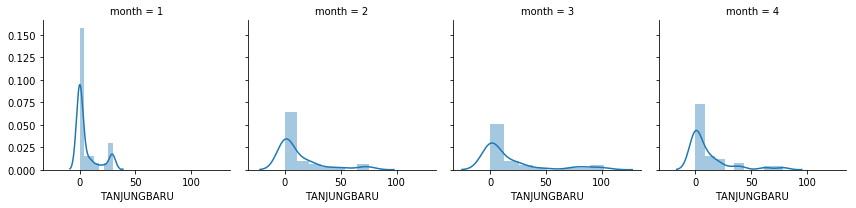

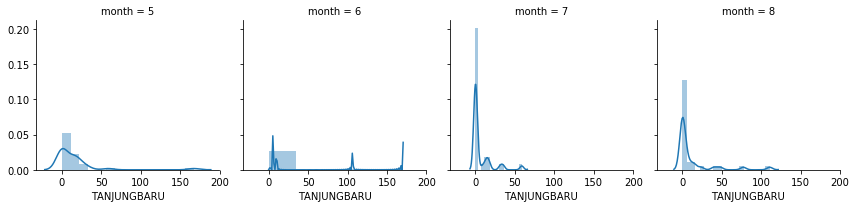

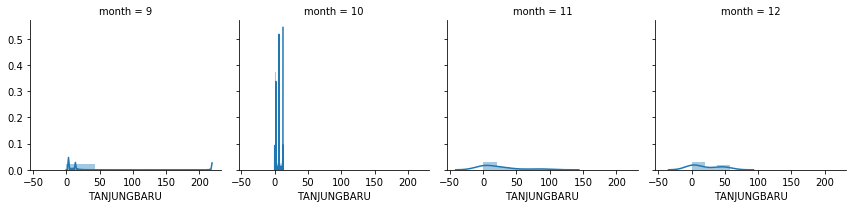

In [54]:
phdf_month = phdf.assign(month=phdf.index.month)
g = sns.FacetGrid(phdf_month[phdf_month['month'] <= 4], col='month')
g.map(sns.distplot, 'TANJUNGBARU')

g = sns.FacetGrid(
    phdf_month[(phdf_month['month'] > 4) & (phdf_month['month'] <= 8)],
    col='month')
g.map(sns.distplot, 'TANJUNGBARU')

g = sns.FacetGrid(phdf_month[(phdf_month['month'] > 8)], col='month')
g.map(sns.distplot, 'TANJUNGBARU')


## Plotting

Plotting dengan periode seluruh yang ada di `dataframe`

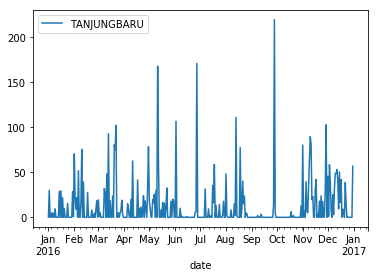

In [19]:
phdf.plot();

Plotting dengan periode tertentu

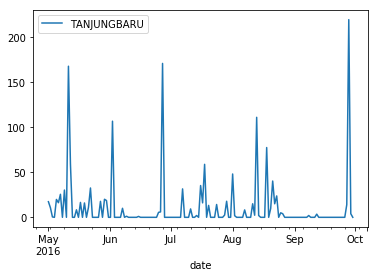

In [20]:
phdf['20160501':'20161001'][:-1].plot();

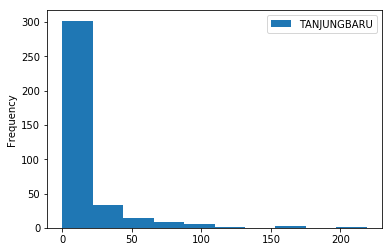

In [21]:
phdf.plot.hist(bins=10)

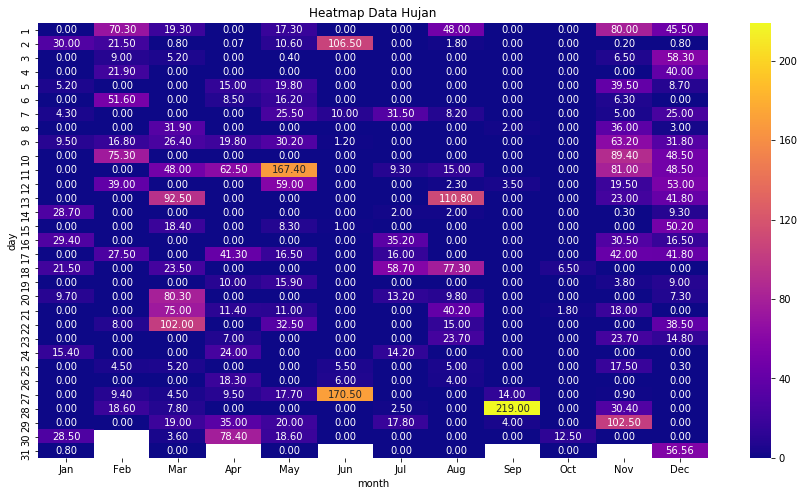

In [22]:
plt.figure(figsize=(15,8))
g = sns.heatmap(viewp(phdf), cmap='plasma', annot=True, fmt='.2f')
g.set_title('Heatmap Data Hujan');

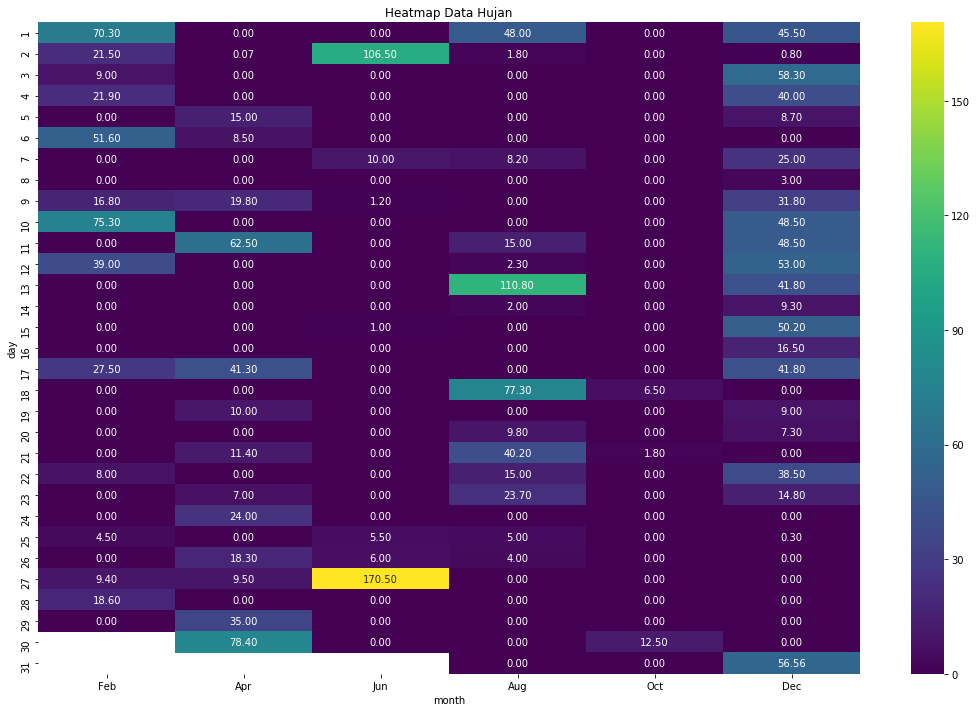

In [23]:
plt.figure(figsize=(15,10))
g = sns.heatmap(viewp(phdf).iloc[:,1::2], cmap='viridis', annot=True, fmt='.2f')
g.set_title('Heatmap Data Hujan');
plt.tight_layout()

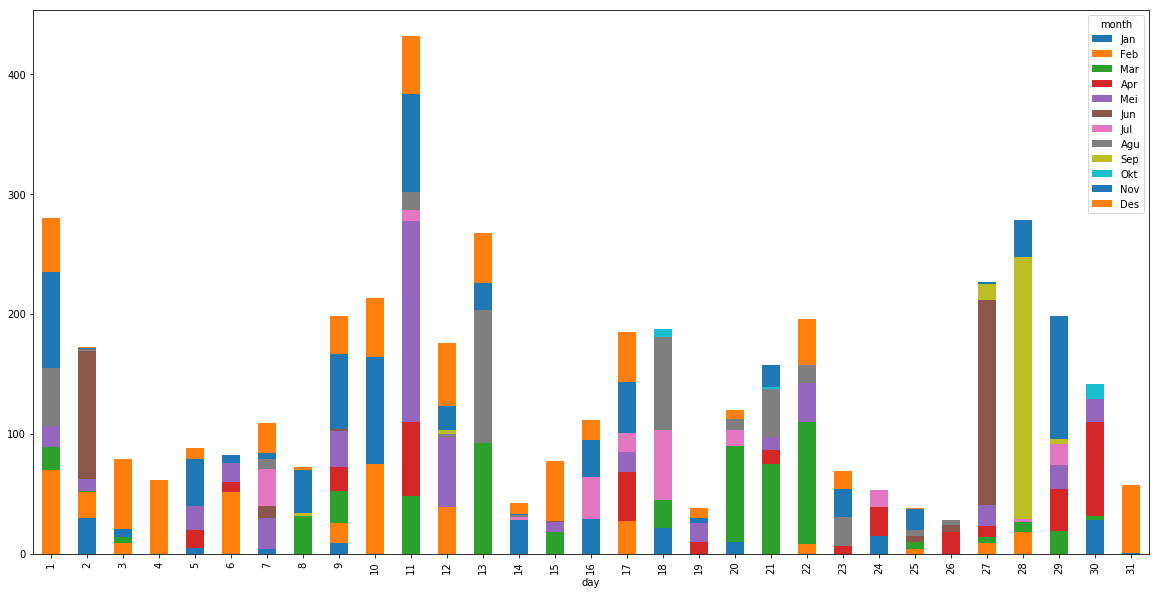

In [24]:
viewp(phdf, fmt='id').plot.bar(stacked=True, figsize=(20,10))
# ini plot untuk coba-coba saja, 
# kenyataannya gak mungkin dalam bentuk seperti ini untuk representasi hujan dalam satu tahun.

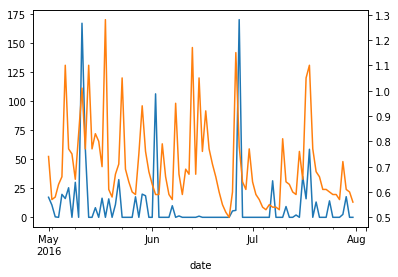

In [25]:
g = phdf.loc['20160501':'20160801',:][:-1].plot(legend=False)
g = pddf.loc['20160501':'20160801',:][:-1].plot(secondary_y=True, ax=g, legend=False)

# Update Notes

```
> 20181019
- fix typo, add info.
> 20181018
- struktur folder baru
> 20181015
- tambah grafik
- viewp dapat menampilkan dengan bulan
> 20181014
- merombak penulisan dan struktur notebook
- tambah sns plot
> 20181012
- initial commit
```
